# Харчевников А А ИУ5-64Б РК №1

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [55]:
# подключаем обучающую выборку
data = pd.read_csv('states_all.csv', sep=",")

In [94]:
# размер датасета
data.shape

(1918, 25)

In [57]:
# типы колонок
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [58]:
# проверяем, есть ли пропущенные значения
data.isnull().sum()

PRIMARY_KEY                        0
STATE                              2
YEAR                               0
ENROLL                           694
TOTAL_REVENUE                    643
FEDERAL_REVENUE                  643
STATE_REVENUE                    643
LOCAL_REVENUE                    643
TOTAL_EXPENDITURE                643
INSTRUCTION_EXPENDITURE          643
SUPPORT_SERVICES_EXPENDITURE     643
OTHER_EXPENDITURE                694
CAPITAL_OUTLAY_EXPENDITURE       643
GRADES_PK_G                      376
GRADES_KG_G                      286
GRADES_4_G                       286
GRADES_8_G                       286
GRADES_12_G                      286
GRADES_1_8_G                     898
GRADES_9_12_G                    847
GRADES_ALL_G                     286
AVG_MATH_4_SCORE                1383
AVG_MATH_8_SCORE                1387
AVG_READING_4_SCORE             1386
AVG_READING_8_SCORE             1421
dtype: int64

In [95]:
# первые 5 строк датасета
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN


In [60]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1918


# Обработка пропусков
## 1. Удаление или заполнение нулями

In [61]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1918, 25), (1918, 2))

In [62]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1918, 25), (306, 25))

In [63]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN


In [64]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,0.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,0.0,0.0,731634.0,208.327876,252.187522,207.963517,0.000000
1,1992_ALASKA,ALASKA,1992,0.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,0.0,0.0,122487.0,0.000000,0.000000,0.000000,258.859712
2,1992_ARIZONA,ARIZONA,1992,0.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,0.0,0.0,673477.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,0.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,0.0,0.0,441490.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,0.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,0.0,0.0,5254844.0,208.398961,260.892247,196.764414,0.000000


## 2. "Внедрение значений" - импьютация (imputation)

### 2.1 Обработка пропусков в числовых данных

In [65]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col,dt,temp_null_count, temp_perc))

Колонка ENROLL. Тип данных float64. Количество пустых значений 694, 36.18%.
Колонка TOTAL_REVENUE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка FEDERAL_REVENUE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка STATE_REVENUE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка LOCAL_REVENUE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка TOTAL_EXPENDITURE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка INSTRUCTION_EXPENDITURE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка SUPPORT_SERVICES_EXPENDITURE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка OTHER_EXPENDITURE. Тип данных float64. Количество пустых значений 694, 36.18%.
Колонка CAPITAL_OUTLAY_EXPENDITURE. Тип данных float64. Количество пустых значений 643, 33.52%.
Колонка GRADES_PK_G. Тип данных float64. Количество пустых значений 376, 19.6%.
Колонка GRADES_KG_G. Тип данных float64. Количест

In [66]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
1,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,258.859712
2,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.253932,265.366278,206.212716,262.169895
3,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.206028,256.312090,208.634458,264.619665
4,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,244.243515,288.172322,221.519266,262.720477
1914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,237.554934,277.180126,223.353443,269.553823
1915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,234.043993,274.673821,213.127835,265.767860
1916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.588947,286.376160,221.750123,259.753002


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


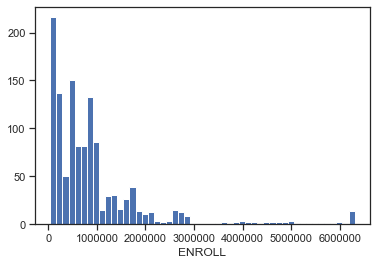

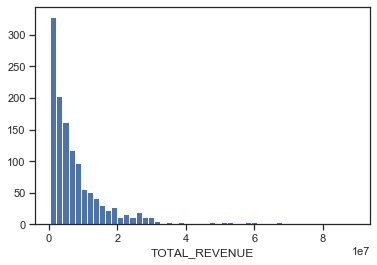

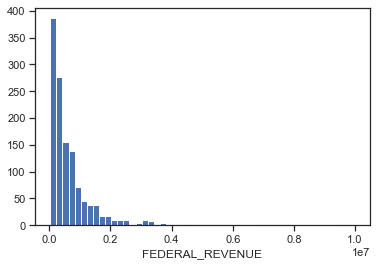

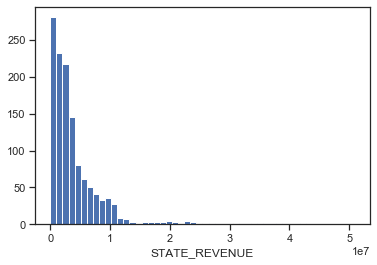

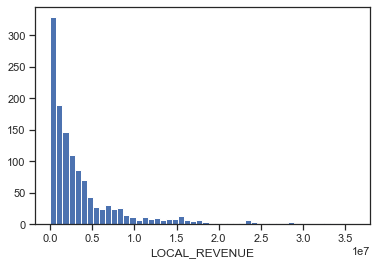

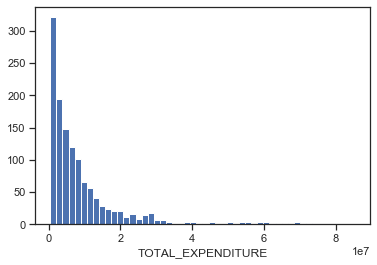

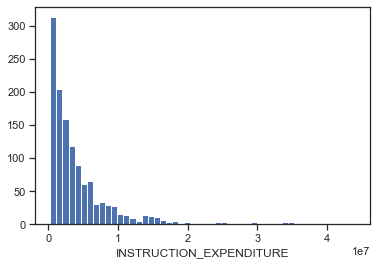

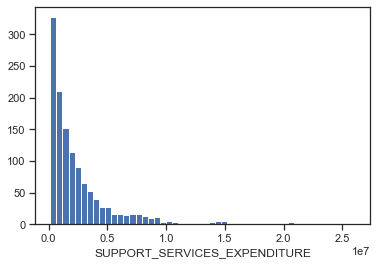

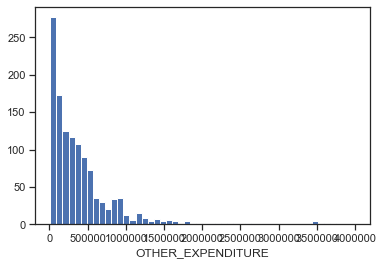

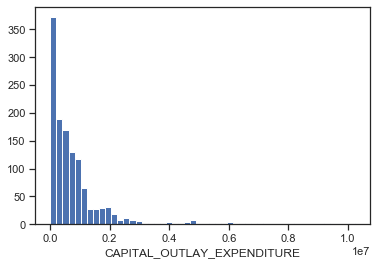

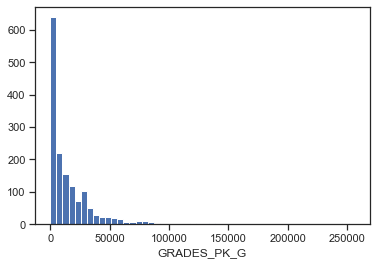

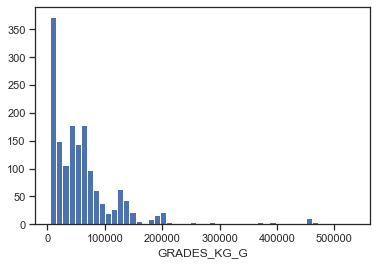

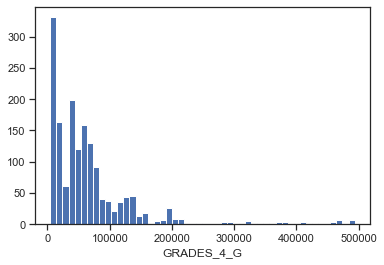

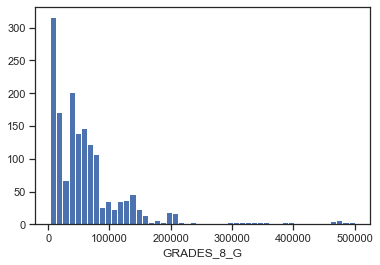

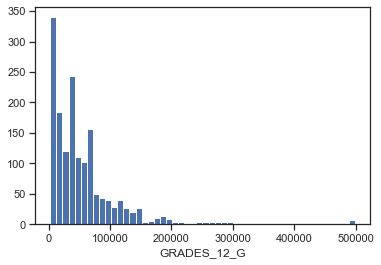

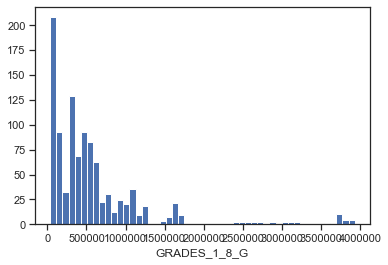

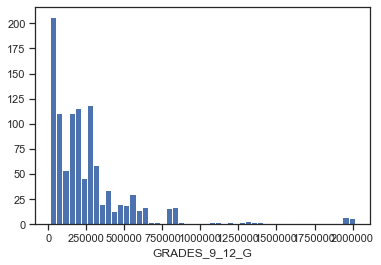

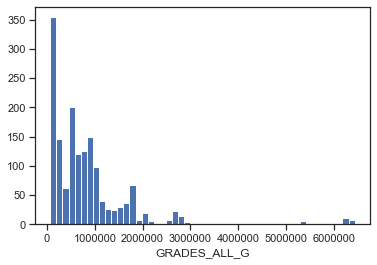

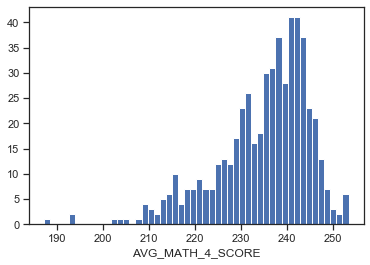

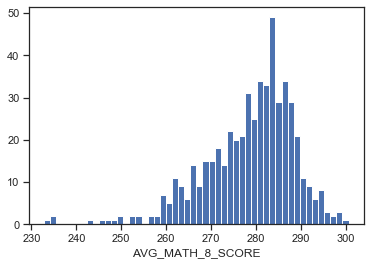

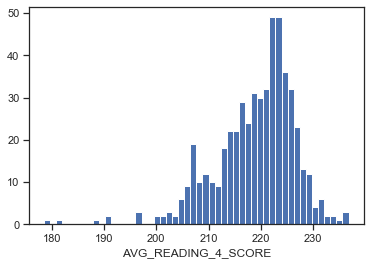

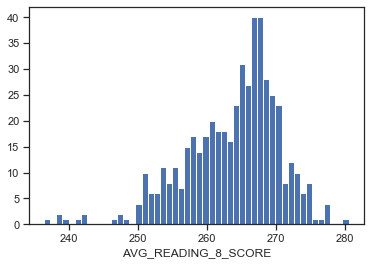

In [67]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [68]:
# Фильтр по пустым значениям поля AVG_READING_8_SCORE
data[data['AVG_READING_8_SCORE'].isnull()]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
10,1992_GEORGIA,GEORGIA,1992,NaN,5536901.0,398701.0,2798674.0,2339526.0,5535942.0,3043984.0,...,99648.0,92374.0,63646.0,NaN,NaN,1207186.0,215.594906,259.359434,206.844175,NaN
11,1992_HAWAII,HAWAII,1992,NaN,996809.0,71273.0,903443.0,22093.0,1040121.0,536115.0,...,13754.0,11750.0,9051.0,NaN,NaN,177448.0,214.056666,257.410887,200.880272,NaN
12,1992_IDAHO,IDAHO,1992,NaN,859329.0,69138.0,531912.0,258279.0,886161.0,473505.0,...,18607.0,18880.0,14593.0,NaN,NaN,231668.0,221.562534,275.090294,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,1987_WYOMING,WYOMING,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7538.0,6964.0,6741.0,NaN,NaN,98455.0,NaN,NaN,NaN,NaN
1902,1988_WYOMING,WYOMING,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8007.0,7158.0,6753.0,NaN,NaN,97793.0,NaN,NaN,NaN,NaN
1903,1989_WYOMING,WYOMING,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8126.0,6959.0,6281.0,NaN,NaN,97172.0,NaN,NaN,NaN,NaN
1904,1990_WYOMING,WYOMING,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7935.0,7376.0,6245.0,NaN,NaN,98226.0,NaN,NaN,NaN,NaN


In [69]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['AVG_READING_8_SCORE'].isnull()].index
flt_index

Int64Index([   0,    4,   10,   11,   12,   13,   14,   15,   16,   17,
            ...
            1895, 1896, 1897, 1898, 1900, 1901, 1902, 1903, 1904, 1905],
           dtype='int64', length=1421)

In [70]:
# Проверяеем, что выводятся нужные строки
data[data.index.isin(flt_index)]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.327876,252.187522,207.963517,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.398961,260.892247,196.764414,NaN
10,1992_GEORGIA,GEORGIA,1992,NaN,5536901.0,398701.0,2798674.0,2339526.0,5535942.0,3043984.0,...,99648.0,92374.0,63646.0,NaN,NaN,1207186.0,215.594906,259.359434,206.844175,NaN
11,1992_HAWAII,HAWAII,1992,NaN,996809.0,71273.0,903443.0,22093.0,1040121.0,536115.0,...,13754.0,11750.0,9051.0,NaN,NaN,177448.0,214.056666,257.410887,200.880272,NaN
12,1992_IDAHO,IDAHO,1992,NaN,859329.0,69138.0,531912.0,258279.0,886161.0,473505.0,...,18607.0,18880.0,14593.0,NaN,NaN,231668.0,221.562534,275.090294,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,1987_WYOMING,WYOMING,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7538.0,6964.0,6741.0,NaN,NaN,98455.0,NaN,NaN,NaN,NaN
1902,1988_WYOMING,WYOMING,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8007.0,7158.0,6753.0,NaN,NaN,97793.0,NaN,NaN,NaN,NaN
1903,1989_WYOMING,WYOMING,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8126.0,6959.0,6281.0,NaN,NaN,97172.0,NaN,NaN,NaN,NaN
1904,1990_WYOMING,WYOMING,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7935.0,7376.0,6245.0,NaN,NaN,98226.0,NaN,NaN,NaN,NaN


In [71]:
# Фильтр по колонке
data_num[data_num.index.isin(flt_index)]['AVG_READING_8_SCORE']

0      NaN
4      NaN
10     NaN
11     NaN
12     NaN
        ..
1901   NaN
1902   NaN
1903   NaN
1904   NaN
1905   NaN
Name: AVG_READING_8_SCORE, Length: 1421, dtype: float64

In [72]:
data_num_AVG_READING_8_SCORE = data_num[['AVG_READING_8_SCORE']]
data_num_AVG_READING_8_SCORE.head()

,AVG_READING_8_SCORE
0,NaN
1,258.859712
2,262.169895
3,264.619665
4,NaN


In [73]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [74]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_AVG_READING_8_SCORE)
mask_missing_values_only

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [75]:
strategies=['mean', 'median', 'most_frequent']

In [76]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_AVG_READING_8_SCORE)
    return data_num_imp[mask_missing_values_only]

In [77]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([263.68332465, 263.68332465, 263.68332465, ..., 263.68332465,
        263.68332465, 263.68332465]))

In [78]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([265.02285851, 265.02285851, 265.02285851, ..., 265.02285851,
        265.02285851, 265.02285851]))

In [79]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([236.37910176, 236.37910176, 236.37910176, ..., 236.37910176,
        236.37910176, 236.37910176]))

In [80]:
# Более сложная функция, которая позволяет задавать колонку и вид импбютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [81]:
data[['TOTAL_REVENUE']].describe()

,TOTAL_REVENUE
count,1.275000e+03
mean,9.102045e+06
std,1.175962e+07
min,4.656500e+05
25%,2.189504e+06
50%,5.085826e+06
75%,1.084516e+07
max,8.921726e+07


In [82]:
test_num_impute_col(data, 'TOTAL_REVENUE', strategies[0])

('TOTAL_REVENUE', 'mean', 643, 9102044.929411765, 9102044.929411765)

In [83]:
test_num_impute_col(data, 'TOTAL_REVENUE', strategies[1])

('TOTAL_REVENUE', 'median', 643, 5085826.0, 5085826.0)

In [84]:
test_num_impute_col(data, 'TOTAL_REVENUE', strategies[2])

('TOTAL_REVENUE', 'most_frequent', 643, 3870164.0, 3870164.0)

### 2.2 Обработка пропусков в категориальных данных

In [96]:
# Выберем категориальные колонки с пропущенными значениями
cat_cols = []
for col in data.columns:
    # Кол-во пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Кол-во пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка STATE. Тип данных object. Кол-во пустых значений 2, 0.1%.


In [86]:
cat_temp_data = data[['STATE']]
cat_temp_data.head()

,STATE
0,ALABAMA
1,ALASKA
2,ARIZONA
3,ARKANSAS
4,CALIFORNIA


In [87]:
cat_temp_data['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', nan, 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_DAKOTA', 'OHIO',
       'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE_ISLAND',
       'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH',
       'VERMONT', 'VIRGINIA', 'WASHINGTON', 'WEST_VIRGINIA', 'WISCONSIN',
       'WYOMING', 'LOUISIANA', 'NORTH_CAROLINA', 'DISTRICT OF COLUMBIA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'RHODE ISLAND', 'SOUTH CAROLINA',
       'SOUTH DAKOTA', 'WEST VIRGINIA'], dtype=object)

In [88]:
cat_temp_data[cat_temp_data['STATE'].isnull()].shape

(2, 1)

In [89]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['ALABAMA'],
       ['ALASKA'],
       ['ARIZONA'],
       ...,
       ['SOUTH_CAROLINA'],
       ['SOUTH_DAKOTA'],
       ['WEST_VIRGINIA']], dtype=object)

In [90]:
np.unique(data_imp2)

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'DISTRICT_OF_COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO',
       'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA',
       'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'NORTH_CAROLINA', 'NORTH_DAKOTA',
       'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND',
       'RHODE_ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'SOUTH_CAROLINA',
       'SOUTH_DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT',
       'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WEST_VIRGINIA',
       'WISCONSIN', 'WYOMING'], dtype=object)

In [97]:
# Импбютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Москва')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['ALABAMA'],
       ['ALASKA'],
       ['ARIZONA'],
       ...,
       ['SOUTH_CAROLINA'],
       ['SOUTH_DAKOTA'],
       ['WEST_VIRGINIA']], dtype=object)

In [98]:
np.unique(data_imp3)

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'DISTRICT_OF_COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO',
       'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA',
       'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO', 'NEW YORK',
       'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH CAROLINA', 'NORTH DAKOTA', 'NORTH_CAROLINA', 'NORTH_DAKOTA',
       'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND',
       'RHODE_ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'SOUTH_CAROLINA',
       'SOUTH_DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT',
       'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WEST_VIRGINIA',
       'WISCONSIN', 'WYOMING', 'Москва'], dtype=object)

In [99]:
data_imp3[data_imp3=='Москва'].size

2